<a href="https://colab.research.google.com/github/didimarques01/training-model-IA/blob/master/IA-Converse-Celsius-Fahrenheit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**O Básico: Treinando o primeiro modelo**

Bem-Vindo ao Colab aqui você irá treinar seu primeiro modelo de Machine Learning

Tentaremos manter as coisas simples por aqui, apenas passando conceitos introdutorios básicos.

O problema a seguir envolve converter a temperatura de Celsius para Fahrenheit, no qual a formúla é:

                 F = (c x 1,8) + 32

daremos para o TensorFlow valores de entrada(0, 8, 15, 22, 38) e os valores correspondetes de sáida em Fahrenheit(32, 46, 59, 72, 100). Dessa forma, Iremos treinar o modelo para encontrar algum algoritmo que indique a formúla passada anteriormente.          
    
            

**Import dependencies**

Primeiro vamos importar as bibliotecas do Tensor Flow e logo em seguida o NumPy

In [0]:
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

import numpy as np

**Inserindo os dados que serão treinados**

O aprendizado de máquina supervisionado tem tudo a ver com um algotitmo, considerando um conjunto de entradas e saídas. Como a tarefa neste Codelab é criar um modelo que possa fornecer a temperatura em Fahrenheit quando receber o grau em Celsius, criamos duas listas celsius_q e fahrenheit_a que podemos usar para treinar nosso modelo.

In [44]:
celsius_q =    np.array([-40, -10, 0,  8,  15, 22,  38], dtype=float)
fahrenheit_a = np.array([-40,  14, 32, 46, 59, 72, 100], dtype=float)

for i,c in enumerate(celsius_q):
    print("{} grau Celsius = {} grau Fahrenheit".format(c, fahrenheit_a[i]))

-40.0 grau Celsius = -40.0 grau Fahrenheit
-10.0 grau Celsius = 14.0 grau Fahrenheit
0.0 grau Celsius = 32.0 grau Fahrenheit
8.0 grau Celsius = 46.0 grau Fahrenheit
15.0 grau Celsius = 59.0 grau Fahrenheit
22.0 grau Celsius = 72.0 grau Fahrenheit
38.0 grau Celsius = 100.0 grau Fahrenheit


**Create the Model**

Vamos Criar o modelo.

**Construindo uma camada**

chamaremos a camada l0 e a criaremos instantaneamente tf.keras.layers.Dense com a seguinte configuração.

  

*   input_shape = [1] - 
Isso especifica que a entrada para a camada é um valor único. isto é, a forma é uma matriz unidimensional com um membro. Como essa é a primeira (e única) camada, esse formato de entrada é o formato de entrada de todo o modelo. O valor único é um número de ponto flutuante, representando graus Celsius.

*   units=1 - Isso especifica o número de neurônios na camada. O número de neurônios define quantas variáveis internas a camada precisa tentar aprender a resolver o problema (mais adiante). Uma vez que esta é a camada final. É também o tamanho da saída do modelo - um único valor flutuante representando o grau Fahrenheit. (Em uma rede de várias camadas, o tamanho e a forma da última precisarão corresponder à forma de entrada da próxima camada)



In [0]:
l0 = tf.keras.layers.Dense(units=1, input_shape=[1])

**Montar camadas no modelo**

Depois que as camadas são definidas, elas precisam ser montadas em um modelo. A definição de modelo sequencial usa uma lista de camadas como argumento, especificando a ordem de cálculo da entrada à saída

In [0]:
model = tf.keras.Sequential([l0])

**Compilando o modelo, com função perda e otimizador**

Antes do treinament o modelo tem que ser compilado. Quando compilado para treino, o modelo terá:




*   Loss function - Uma maneira de medir a que distância estão as previsões do resultado desejado (a diferença medida é chamada de perda).

*   Optimizer function - uma maneira de ajustar os valores internos para reduzir a perda.





In [0]:
model.compile(loss='mean_squared_error', 
              optimizer=tf.keras.optimizers.Adam(0.1))

TensorFlow usa analíse númerica para encontrar o melhor modelo. E o TensorFlow encapsula toda a complexidade que está acontecendo.

O 0.1 é chamado de taxa de aprendizagem. É possívl ajustar ao treinar seus próprios modelos. Serve para informar ao TensorFlow com que agressividade ele deve tentar encontrar o melhor modelo. Qualquer valor entre 0,1 e 0,001 pode fazer sentido.

**Treinando o modelo**

Treinar o modelo chamando o método de ajuste.

Durante o treinamento, o modelo obtém valores Celsius, realiza um cálculo usando as variáveis internas atuais (chamadas "pesos") e gera valores que devem ser equivalentes a Fahrenheit. Como as ponderações são inicialmente definidas aleatoriamente, a saída não estará próxima do valor correto. A diferença entre a saída real e a saída desejada é calculada usando a função de perda, e a função otimizador direciona como os pesos devem ser ajustados.

Neste ciclo de cálculo, o ajuste de comparação é controlado pelo método de ajuste. O primeiro argumento são as entradas, o segundo argumento são as saídas desejadas. O argumento das épocas especifica quantas vezes esse ciclo deve ser executado, e o argumento detalhado controla a quantidade de saída que o método produz.

In [48]:
history = model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("Finished training the model")

Finished training the model


epochs é uma interação completa dos exemplos que vimos dos valores de Celsius e Fahrenheit. Como tivemos 7 exemplos mapeados de Celsius e Fahrenheit o modelos treinará 3.500 exemplos

**Gráfico de estatísticas de treinamento**

O método fit retorna um objeto de histórico. Podemos usar esse objeto para traçar a perda de nosso modelo diminui após cada época de treinamento. Uma perda alta significa que o grau Fahrenheit previsto pelo modelo está longe do valor correspondente em fahrenheit_a.

Bem, use o Matplotlib para visualizá-lo (você pode usar outra ferramenta). Como você vê no carro, nosso modelo melhora muito rapidamente no início, e ele tem uma melhoria lenta e constante até que esteja quase "perfeito" no final.

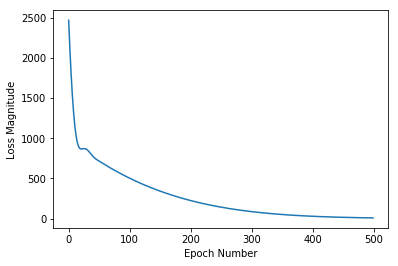

In [49]:
import matplotlib.pyplot as plt

plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

Podemos ver que no começo a perda é muito grande, ou seja, a IA perde muitos exemplos de treinamento, mas conforme vai passando as épocas ela aperfeiçoa o treinamento. 

**Usando o modelo para prever valores**

Agora você tem um modelo que foi treinado para aprender a relação entre celsius_q e fahrenheit_a. Você pode usar o método de previsão para calcular o grau Fahrenheit para um grau Celsius desconhecido anteriormente.

Então, por exemplo, se o valor de Celsius for 200, Qual você acha que será o resultado em Fahrenheit? Adivinhe antes de executar o código.

In [50]:
print(model.predict([100.0]))

[[211.3278]]


A resposta certa é: (100 x 1,8) + 32 = 212. Seu modelo treinou muito bem.

Lembrando que o modelo não fazia ideia da equação de conversão de temperatura.

**Exibindo as camdas internas de Pesos**

Finalmente vamos imprimir as variáveis internas das camadas densas.


In [51]:
print("Essas são as variáveis nas camadas: {}".format(l0.get_weights()))

Essas são as variáveis nas camadas: [array([[1.8220137]], dtype=float32), array([29.126434], dtype=float32)]


A primeira variável está perto de ~ 1,8 e o segundo em ~ 32. 
Esses valores (1.8 e 32) são as variáveis reais na fórmula de conversão real.

Isso é muito próximo dos valores na fórmula de conversão. Explicaremos isso em um próximo vídeo, onde mostraremos como uma camada densa funciona, mas para um único neurônio com uma única entrada e uma única saída, a matemática interna é igual à equação de uma linha y = mx + h, que a mesma forma que a equação de conversão f = 1,8c + 32.

Como o formulário é o mesmo, as variáveis devem convergir para os valores padrão de 1,0 e 32, o que aconteceu exatamente.

Com neurônios adicionais, entradas adicionais e otputs adicionais, a fórmula se torna muito mais complexa, mas a idéia é a mesma.

**Um pequeno experimento**

Apenas por diversão, se nós criarmos mais uma camada densa com diferentes units, que portanto também, tem mais variáveis? 

In [65]:
l0 = tf.keras.layers.Dense(units=4, input_shape=[1])
l1 = tf.keras.layers.Dense(units=4)
l2 = tf.keras.layers.Dense(units=1)
model = tf.keras.Sequential([l0, l1, l2])
model.compile(loss = 'mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))
model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print('Finished training the model')
print(model.predict([100.0]))
print("Previsão do modelo de 100 graus Celsius é: {} graus Fahrenheit".format(model.predict([100.0])),"\n")
print("Essas são as variáveis l0 nas camadas: {}".format(l0.get_weights()),"\n")
print("Essas são as variáveis l1 nas camadas: {}".format(l1.get_weights()),"\n")
print("Essas são as variáveis l2 nas camadas: {}".format(l2.get_weights()),"\n")

Finished training the model
[[211.74744]]
Previsão do modelo de 100 graus Celsius é: [[211.74744]] graus Fahrenheit 

Essas são as variáveis l0 nas camadas: [array([[-0.57903737, -0.3378282 , -0.01648415, -0.41611645]],
      dtype=float32), array([-3.4787624, -3.306616 ,  3.109909 , -3.3754115], dtype=float32)] 

Essas são as variáveis l1 nas camadas: [array([[ 0.10213055,  0.14105873, -0.04043552, -1.0576183 ],
       [ 0.55108935, -0.01364621,  0.66462094, -0.29461637],
       [-0.00752157, -0.13063838, -0.27760828,  1.0270787 ],
       [ 0.4719511 ,  1.1198874 , -0.32088074, -0.5378943 ]],
      dtype=float32), array([-3.3266766, -3.139364 , -2.6925497,  3.4313734], dtype=float32)] 

Essas são as variáveis l2 nas camadas: [array([[-0.7481978 ],
       [-1.0795766 ],
       [-0.64094806],
       [ 0.9177069 ]], dtype=float32), array([3.314917], dtype=float32)] 

